In [1]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [3]:
X = dataset[:,0:10]

In [4]:
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_val_and_test,Y_train,Y_val_and_test = train_test_split(X_scale,Y,test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [15]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
hist = model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 18s 20ms/step - loss: 0.6861 - accuracy: 0.5629 - val_loss: 0.6746 - val_accuracy: 0.6027
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5767 - val_loss: 0.6695 - val_accuracy: 0.6073
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5946 - val_loss: 0.6649 - val_accuracy: 0.6164
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.6114 - val_loss: 0.6608 - val_accuracy: 0.6438
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6472 - val_loss: 0.6567 - val_accuracy: 0.6621
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6759 - val_loss: 0.6527 - val_accuracy: 0.7352
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.7193 - val_loss: 0.6485 - val_accuracy: 0.7580
Epoch 8/100

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8786 - val_loss: 0.3344 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8850 - val_loss: 0.3324 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8831 - val_loss: 0.3304 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8949 - val_loss: 0.3286 - val_accuracy: 0.8447
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8770 - val_loss: 0.3269 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8712 - val_loss: 0.3255 - val_accuracy: 0.8447
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8967 - val_loss: 0.3238 - val_accuracy: 0.8402
Epoch 

In [17]:
model.evaluate(X_test,Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8493


0.8493150472640991

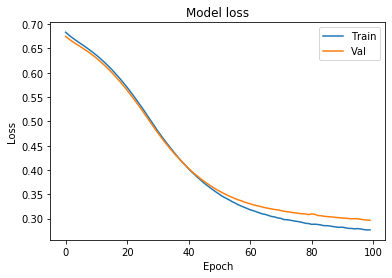

In [19]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

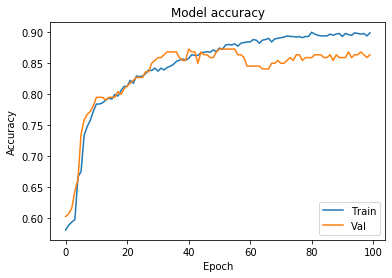

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
hist_2 = model_2.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 47ms/step - loss: 0.5828 - accuracy: 0.6496 - val_loss: 0.3880 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3574 - accuracy: 0.8633 - val_loss: 0.3354 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3150 - accuracy: 0.8811 - val_loss: 0.3335 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2675 - accuracy: 0.8826 - val_loss: 0.3375 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2777 - accuracy: 0.8913 - val_loss: 0.2840 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2764 - accuracy: 0.8824 - val_loss: 0.3027 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2601 - accuracy: 0.8822 - val_loss: 0.2701 - val_accuracy: 0.8676
Epoch 

32/32 [==============================] - 1s 38ms/step - loss: 0.1435 - accuracy: 0.9453 - val_loss: 0.2755 - val_accuracy: 0.9087
Epoch 59/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1514 - accuracy: 0.9374 - val_loss: 0.3150 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 40ms/step - loss: 0.1645 - accuracy: 0.9310 - val_loss: 0.2795 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1643 - accuracy: 0.9443 - val_loss: 0.2661 - val_accuracy: 0.8995
Epoch 62/100
32/32 [==============================] - 1s 43ms/step - loss: 0.1299 - accuracy: 0.9483 - val_loss: 0.3080 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1629 - accuracy: 0.9246 - val_loss: 0.3557 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1978 - accuracy: 0.9240 - val_loss: 0.3735 - val_accuracy: 0.8447
Epoch 65/100

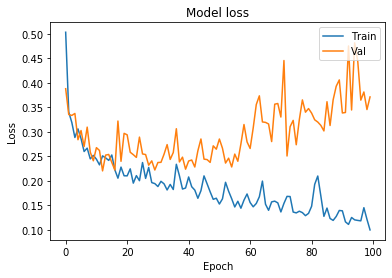

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

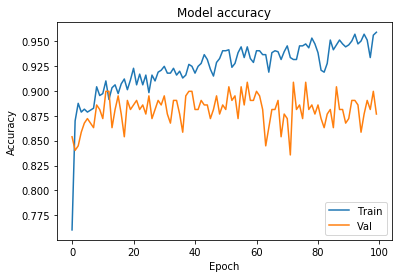

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

In [26]:
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(10,)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [29]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
hist_3 = model_3.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 47ms/step - loss: 14.3604 - accuracy: 0.5663 - val_loss: 2.8217 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 1.8867 - accuracy: 0.8335 - val_loss: 0.6459 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.6040 - accuracy: 0.8625 - val_loss: 0.5721 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.4998 - accuracy: 0.8830 - val_loss: 0.5060 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.4995 - accuracy: 0.8542 - val_loss: 0.5042 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4862 - accuracy: 0.8741 - val_loss: 0.4746 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4745 - accuracy: 0.8817 - val_loss: 0.4846 - val_accuracy: 0.8356
Epoch

32/32 [==============================] - 1s 37ms/step - loss: 0.4618 - accuracy: 0.8791 - val_loss: 0.4397 - val_accuracy: 0.8721
Epoch 59/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4343 - accuracy: 0.8806 - val_loss: 0.4665 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4426 - accuracy: 0.8924 - val_loss: 0.4417 - val_accuracy: 0.8493
Epoch 61/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4504 - accuracy: 0.8834 - val_loss: 0.4580 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4215 - accuracy: 0.8820 - val_loss: 0.4628 - val_accuracy: 0.8493
Epoch 63/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4074 - accuracy: 0.8930 - val_loss: 0.4378 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4250 - accuracy: 0.8804 - val_loss: 0.4311 - val_accuracy: 0.8630
Epoch 65/100

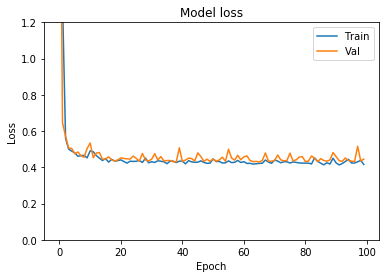

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

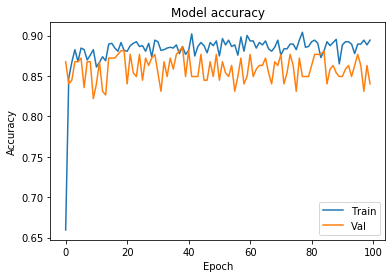

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()